In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_excel(r'C:\Users\tharu\OneDrive\Desktop\Data_Scientist\Day 4 FN-20251212T102946Z-1-001\Day 4 FN\Task_students_performance_dataset.xlsx')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [5]:
df.tail()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
295,S1295,Female,37.889943,93.974474,73.110423,Postgraduate,No,20958.572001,No,No,Yes,Public,9.500750,1.595412,4.361682,6.370988,Average,8.244674,9,59.557187
296,S1296,Female,39.440043,63.033473,46.307163,High School,No,53041.062074,Yes,No,No,Private,8.323931,1.443552,3.443489,5.514181,Good,1.471522,2,37.345842
297,S1297,Male,30.135127,72.613172,31.708055,High School,Yes,55549.679936,No,No,No,Private,6.408674,0.231670,3.086052,9.785683,Poor,2.436624,9,34.668326
298,S1298,Male,15.050383,94.388327,90.906921,Graduate,No,30929.622253,Yes,No,No,Public,4.951745,0.941085,3.867481,7.151084,Average,4.020609,6,58.143709
299,S1299,Female,3.340029,77.454280,31.488859,Postgraduate,Yes,17196.885492,No,No,Yes,Private,9.291953,2.799929,9.132026,4.378970,Good,1.691267,8,30.746761


In [7]:
df.shape

(300, 20)

In [8]:
df.columns

Index(['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Percentage',
       'Previous_Sem_Score', 'Parental_Education', 'Internet_Access',
       'Family_Income', 'Tutoring_Classes', 'Sports_Activity',
       'Extra_Curricular', 'School_Type', 'Sleep_Hours', 'Travel_Time',
       'Test_Anxiety_Level', 'Peer_Influence', 'Teacher_Feedback',
       'Motivation_Level', 'Library_Usage_per_Week', 'Final_Score'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      300 non-null    fl

In [10]:
df.describe()

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20.273491,69.601451,64.102933,54518.876589,6.993096,1.670011,5.468870,5.763599,5.402980,4.436667,41.454265
std,11.844562,17.480853,20.456827,24845.101039,1.734910,0.840759,2.559495,2.476379,2.588179,2.751586,9.989541
min,0.202463,40.681219,30.324242,10111.301178,4.012623,0.101284,1.018167,1.048115,1.045239,0.000000,17.916539
25%,9.871826,54.364955,45.966283,32842.034240,5.450614,0.953231,3.226739,4.106060,3.147787,2.000000,34.401047
50%,21.528196,69.299178,64.715015,56120.473769,7.144770,1.735533,5.536846,5.873572,5.171520,4.000000,41.596899
75%,30.146774,84.850333,81.261818,74997.618701,8.417073,2.436196,7.683439,7.751822,7.758593,7.000000,48.210497
max,39.620206,99.983060,99.781198,99593.244163,9.998283,2.998452,9.995895,9.902960,9.978605,9.000000,67.295712


In [12]:
df.isnull().sum()

Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64

In [13]:
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
corr_matrix

,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Family_Income,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Motivation_Level,Library_Usage_per_Week,Final_Score
Study_Hours_per_Week,1.000000,-0.025527,-0.004994,0.011732,0.003450,-0.073899,0.017027,0.058725,-0.027800,0.011453,0.464599
Attendance_Percentage,-0.025527,1.000000,0.057314,0.045297,-0.037409,-0.139791,-0.048912,0.015469,-0.062293,-0.058661,0.335473
Previous_Sem_Score,-0.004994,0.057314,1.000000,0.053951,0.109023,0.102189,0.019225,-0.066642,0.028230,-0.083528,0.632940
Family_Income,0.011732,0.045297,0.053951,1.000000,-0.061424,0.017349,-0.047738,-0.011647,-0.101114,-0.053209,0.090093
Sleep_Hours,0.003450,-0.037409,0.109023,-0.061424,1.000000,0.089308,-0.014337,-0.118823,0.033993,0.066375,0.021040
Travel_Time,-0.073899,-0.139791,0.102189,0.017349,0.089308,1.000000,0.143004,-0.090710,0.057005,-0.000792,-0.037715
Test_Anxiety_Level,0.017027,-0.048912,0.019225,-0.047738,-0.014337,0.143004,1.000000,0.052279,0.066668,-0.027369,-0.042936
Peer_Influence,0.058725,0.015469,-0.066642,-0.011647,-0.118823,-0.090710,0.052279,1.000000,-0.007427,0.096433,-0.024590
Motivation_Level,-0.027800,-0.062293,0.028230,-0.101114,0.033993,0.057005,0.066668,-0.007427,1.000000,0.083030,-0.020367
Library_Usage_per_Week,0.011453,-0.058661,-0.083528,-0.053209,0.066375,-0.000792,-0.027369,0.096433,0.083030,1.000000,-0.111752


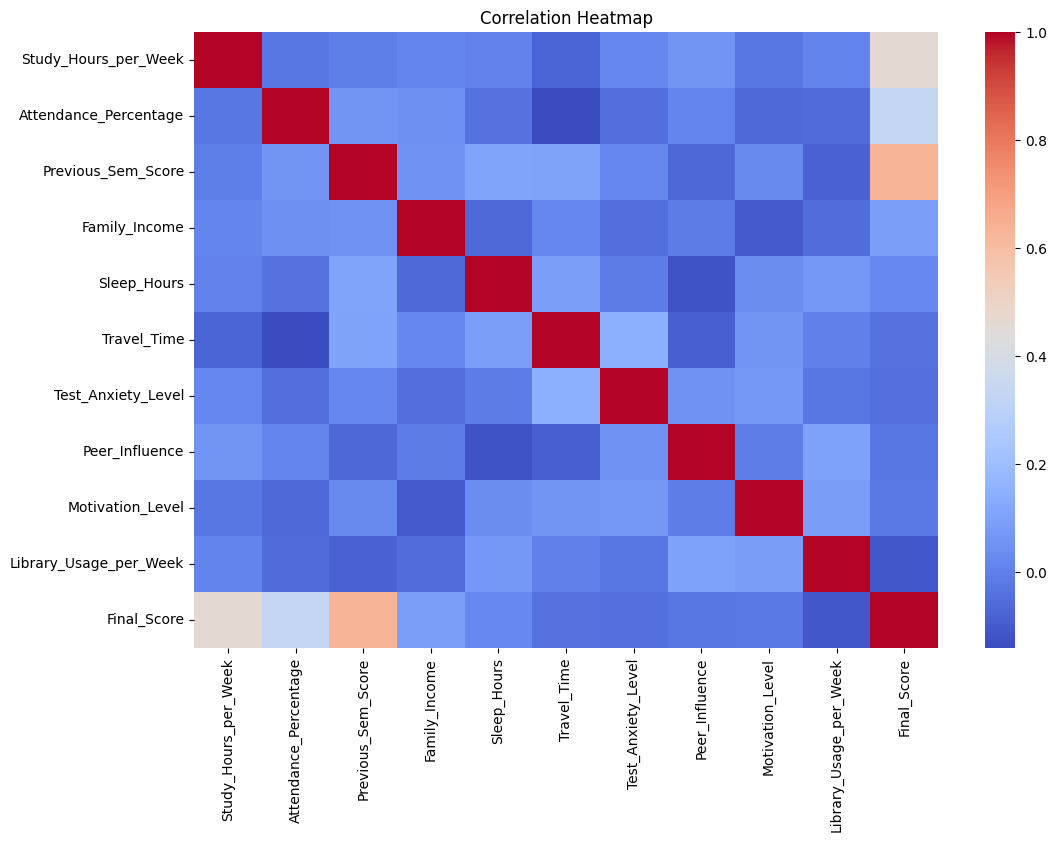

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
X = df[['Study_Hours_per_Week',
        'Attendance_Percentage',
        'Previous_Sem_Score',
        'Sleep_Hours',
        'Motivation_Level']]

y = df['Final_Score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)